In [3]:
import mediapipe
import cv2

In [4]:
import numpy as np

In [5]:
mp_drawing=mediapipe.solutions.drawing_utils
mp_hand=mediapipe.solutions.hands

In [28]:
cap=cv2.VideoCapture(0)

hands=mp_hand.Hands(min_detection_confidence=0.5,min_tracking_confidence=0.5)

while cap.isOpened():
    ret,frame=cap.read()
    
    image=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    image=cv2.flip(image,1)
    
    results=hands.process(image)
    
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    # print(results)
    
    if results.multi_hand_landmarks:
        for num,hand in enumerate(results.multi_hand_landmarks):
            # print(hand)
            mp_drawing.draw_landmarks(image,hand,mp_hand.HAND_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2))
    cv2.imshow("hands",image)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

landmark {
  x: 0.7940447926521301
  y: 0.7980040311813354
  z: 6.662521059297433e-07
}
landmark {
  x: 0.719444990158081
  y: 0.7833404541015625
  z: -0.04218272492289543
}
landmark {
  x: 0.6622560024261475
  y: 0.7333714962005615
  z: -0.08105975389480591
}
landmark {
  x: 0.633019208908081
  y: 0.6839268207550049
  z: -0.11026796698570251
}
landmark {
  x: 0.6111642718315125
  y: 0.6373428702354431
  z: -0.142338365316391
}
landmark {
  x: 0.6622681021690369
  y: 0.6704040169715881
  z: -0.13238561153411865
}
landmark {
  x: 0.609825849533081
  y: 0.5452858209609985
  z: -0.18550673127174377
}
landmark {
  x: 0.5782471895217896
  y: 0.4504408836364746
  z: -0.21668054163455963
}
landmark {
  x: 0.5556163191795349
  y: 0.3736009895801544
  z: -0.23679789900779724
}
landmark {
  x: 0.7299952507019043
  y: 0.6417095065116882
  z: -0.13376334309577942
}
landmark {
  x: 0.6977357864379883
  y: 0.4885411858558655
  z: -0.17665310204029083
}
landmark {
  x: 0.6849786639213562
  y: 0.37519

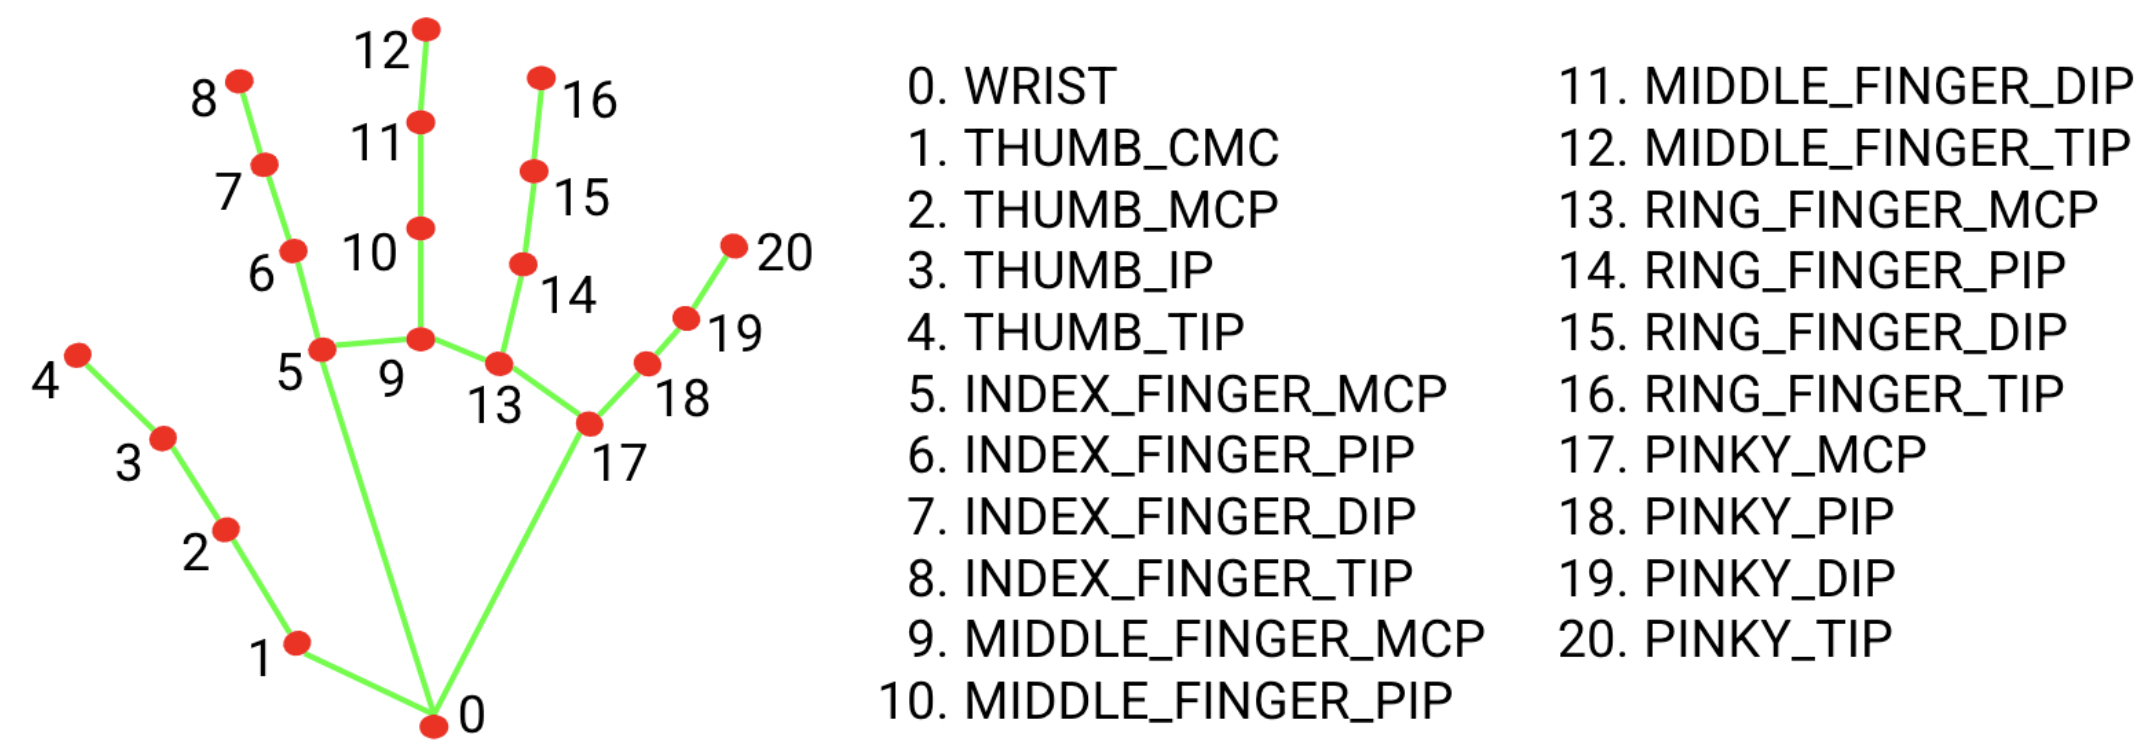

### left and right hand detection

In [13]:
mp_hand.HandLandmark.WRIST

<HandLandmark.WRIST: 0>

In [14]:
results.multi_hand_landmarks[0].landmark[mp_hand.HandLandmark.WRIST]

x: 0.8222306370735168
y: 0.8113013505935669
z: 5.205397997087857e-07

In [19]:
results.multi_handedness[0].classification[0]

index: 1
score: 0.9298600554466248
label: "Right"

In [6]:
def get_label(index,hand,results):
    output=None
    
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            
            label=classification.classification[0].label
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            ##coords
            coords=tuple(np.multiply(np.array((hand.landmark[mp_hand.HandLandmark.WRIST].x,
                                              hand.landmark[mp_hand.HandLandmark.WRIST].y)),[640,480]).astype(int))
            
            output=text,coords
    return output

In [27]:
# get_label(num,hand,results)

In [8]:
cap=cv2.VideoCapture(0)

hands=mp_hand.Hands(min_detection_confidence=0.5,min_tracking_confidence=0.5)

while cap.isOpened():
    ret,frame=cap.read()
    
    image=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    image=cv2.flip(image,1)
    
    results=hands.process(image)
    
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    # print(results)
    
    if results.multi_hand_landmarks:
        for num,hand in enumerate(results.multi_hand_landmarks):
            # print(hand)
            mp_drawing.draw_landmarks(image,hand,mp_hand.HAND_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2))
            
            if get_label(num,hand,results):
                text,coords=get_label(num,hand,results)
                cv2.putText(image,text,coords,cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow("hands",image)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## calculate multiple angles

In [9]:
import matplotlib.pyplot as plt

In [10]:
joint_list=[[8,7,6],[12,11,10]]

In [24]:
def draw_finger_angles(results,image,joint_list):
    
    for hand in results.multi_hand_landmarks:
        for joint in joint_list:
            a=np.array([hand.landmark[joint[0]].x,hand.landmark[joint[0]].y])
            b=np.array([hand.landmark[joint[1]].x,hand.landmark[joint[1]].y])
            c=np.array([hand.landmark[joint[2]].x,hand.landmark[joint[2]].y])
            
            radians=np.arctan2(a[0]-b[0], a[1]-b[1])-np.arctan2(c[0]-b[0], c[1]-b[1])
            angle=np.abs(radians*180.0/np.pi)
            
            if angle>180.0:
                angle=360-angle
            
            cv2.putText(image,str(round(angle,2)),tuple(np.multiply(b,[640,480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
    return image

In [25]:
cap=cv2.VideoCapture(0)

hands=mp_hand.Hands(min_detection_confidence=0.5,min_tracking_confidence=0.5)

while cap.isOpened():
    ret,frame=cap.read()
    
    image=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    image=cv2.flip(image,1)
    
    results=hands.process(image)
    
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    # print(results)
    
    if results.multi_hand_landmarks:
        for num,hand in enumerate(results.multi_hand_landmarks):
            # print(hand)
            mp_drawing.draw_landmarks(image,hand,mp_hand.HAND_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2))
            
            if get_label(num,hand,results):
                text,coords=get_label(num,hand,results)
                cv2.putText(image,text,coords,cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                
        draw_finger_angles(results,image,joint_list)
        
    cv2.imshow("hands",image)
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [23]:
# cap.release()
# cv2.destroyAllWindows()